### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.15.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [7]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

label for each of the below image: 9
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 2
label for each of the below image: 7
label for each of the below image: 2
label for each of the below image: 5
label for each of the below image: 5


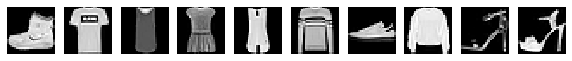

In [8]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(trainX[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(trainY[0:10][i])))
plt.show()


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [9]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Execute the model using model.fit()

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,
          batch_size = 32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 51us/sample - loss: 1993.5416 - acc: 0.7411 - val_loss: 1461.2876 - val_acc: 0.7959
Epoch 2/50
60000/60000 [==============================] - 2s 40us/sample - loss: 1601.4836 - acc: 0.7778 - val_loss: 1058.9883 - val_acc: 0.8113
Epoch 3/50
60000/60000 [==============================] - 2s 41us/sample - loss: 1545.2502 - acc: 0.7850 - val_loss: 1120.6826 - val_acc: 0.8180
Epoch 4/50
60000/60000 [==============================] - 2s 40us/sample - loss: 1552.6609 - acc: 0.7882 - val_loss: 1117.0750 - val_acc: 0.8151
Epoch 5/50
60000/60000 [==============================] - 2s 40us/sample - loss: 1500.0346 - acc: 0.7928 - val_loss: 1325.6685 - val_acc: 0.8000
Epoch 6/50
60000/60000 [==============================] - 2s 41us/sample - loss: 1478.7821 - acc: 0.7965 - val_loss: 941.2178 - val_acc: 0.8281
Epoch 7/50
60000/60000 [==============================] - 2s 40us/sample - loss: 

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:


# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### Execute the model

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,
          batch_size = 32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 52us/sample - loss: 1.0158 - acc: 0.7454 - val_loss: 0.7697 - val_acc: 0.8002
Epoch 2/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.6380 - acc: 0.8340 - val_loss: 0.7291 - val_acc: 0.8027
Epoch 3/50
60000/60000 [==============================] - 3s 54us/sample - loss: 0.6092 - acc: 0.8370 - val_loss: 0.7080 - val_acc: 0.8081
Epoch 4/50
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5921 - acc: 0.8483 - val_loss: 0.7047 - val_acc: 0.8194
Epoch 5/50
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5974 - acc: 0.8488 - val_loss: 0.6840 - val_acc: 0.8207
Epoch 6/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.5863 - acc: 0.8517 - val_loss: 0.7048 - val_acc: 0.8257
Epoch 7/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.5890 - acc: 0.8557 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
# Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

# Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [0]:
# Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

# Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1

### Run the model

In [23]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,
          batch_size = 32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 69us/sample - loss: 0.9507 - acc: 0.6027 - val_loss: 1.0070 - val_acc: 0.5828
Epoch 2/50
60000/60000 [==============================] - 4s 63us/sample - loss: 0.9811 - acc: 0.5901 - val_loss: 1.0165 - val_acc: 0.5853
Epoch 3/50
60000/60000 [==============================] - 4s 63us/sample - loss: 0.9601 - acc: 0.6076 - val_loss: 1.0003 - val_acc: 0.6072
Epoch 4/50
60000/60000 [==============================] - 4s 62us/sample - loss: 0.9610 - acc: 0.6316 - val_loss: 1.1152 - val_acc: 0.5753
Epoch 5/50
60000/60000 [==============================] - 4s 64us/sample - loss: 1.0923 - acc: 0.5820 - val_loss: 1.0562 - val_acc: 0.5970
Epoch 6/50
60000/60000 [==============================] - 4s 63us/sample - loss: 0.9755 - acc: 0.6443 - val_loss: 0.9979 - val_acc: 0.6629
Epoch 7/50
60000/60000 [==============================] - 4s 69us/sample - loss: 0.9323 - acc: 0.6805 - val_loss: 0.